# Data Mining Project

On February 2017 one new potential client in Financial Services required Bip’s support in the assessment on the risk of default for his credit card users. The client has already collected and structured the data of about 27.000 of its credit card subscribers, reporting some of their personal information and their aggregate payments history for the last 6 months (July to December 2016). Data has been collected in the train.csv file. Their request is to support them, by using this data, in discriminating credible subs from non-credible so to enable proactive risk management actions.

## Importing the Libraries
In the following box we import all the necessary libraries that will be used along the notebook.

In [1]:
# Useful Libraries
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

# stat libraries
from scipy import stats

# Importing all classifiers from Scikitlearn
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# stat libraries
from scipy import stats

# Libraries for the evaluation
from sklearn import model_selection
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Imbalanced Learning Library Imports
from collections import Counter
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalanceCascade 
from imblearn.ensemble import EasyEnsemble 

# A powerful Classifier
from xgboost import XGBClassifier


# In order to plot graphics
import matplotlib.cm as cm
%matplotlib inline

## Loading the DS
We used the pandas library to load the training set and perform the first reshape, useful to access the data with ease. The command describe() shows a brief recap of the principal characteristics of the dataset, feature by feature.

In [2]:
# Importing the dataset
dataset = pd.read_csv('Project Train Dataset.csv', delimiter=',')
dataset.to_csv('train_ds.csv', quoting=csv.QUOTE_NONE, sep=',', index=False, escapechar=' ')
cleaned_dataset = pd.read_csv('train_ds.csv', delimiter=',')

cleaned_dataset.columns = ['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
       'BIRTH_DATE', 'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'BILL_AMT_DEC', 'BILL_AMT_NOV',
       'BILL_AMT_OCT', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'PAY_AMT_DEC', 'PAY_AMT_NOV', 'PAY_AMT_OCT', 'PAY_AMT_SEP',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'DEFAULT_PAYMENT_JAN']

cleaned_dataset.describe()

,CUST_COD,LIMIT_BAL,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,PAY_JUL,BILL_AMT_DEC,BILL_AMT_NOV,...,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT_PAYMENT_JAN
count,2.688400e+04,26884.00000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,...,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000
mean,3.506806e+07,4997.91411,-0.016367,-0.133313,-0.166344,-0.219052,-0.264879,-0.291884,1530.136656,1467.012379,...,1292.346498,1203.977907,1159.529034,168.639427,178.825861,156.416357,144.518815,144.259750,157.534344,0.221098
std,1.423976e+07,3879.73624,1.123991,1.197715,1.197837,1.171221,1.135089,1.150547,2206.111841,2129.923058,...,1923.241494,1816.137779,1775.876050,495.392694,688.001298,531.588567,465.903631,463.780141,538.637089,0.414994
min,1.015513e+07,298.13600,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-4936.535888,-2080.303567,...,-2424.859342,-2424.859342,-10124.788000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.275616e+07,1490.68000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,105.115300,87.622170,...,68.951403,52.553923,37.594950,29.634718,24.879449,11.627304,8.884453,7.870790,3.637259,0.000000
50%,3.519585e+07,4173.90400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,667.198554,631.705464,...,568.008707,539.998830,506.920641,62.608560,60.044590,54.260752,44.720400,44.720400,44.720400,0.000000
75%,4.727209e+07,7155.26400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.891324,1905.320095,...,1629.998953,1504.528417,1473.179417,149.276695,149.068000,134.369895,119.709057,120.379863,119.321481,0.000000
max,5.963161e+07,29813.60000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28755.545150,29334.525260,...,26581.388370,27642.305330,28670.665830,26043.729910,50213.824120,26714.178140,18514.245600,12716.364990,15761.436660,1.000000


## Data Set Description

Features
- CUST_COD: Customer code
- LIMIT_BAL: Amount of credit given to the client (€)
- SEX: Gender
- EDUCATION: Education level
- MARRIAGE: Marital status
- BIRTH_DATE: Date of birth
- PAY_DEC ... PAY_NOV: History of payments for the past 6 months (Jul-Dec) (<=0 Duly...1 Month late)
- BILL_AMT_DEC ... BILL_AMT_NOV: Amount of bill statement per month (€) for the past 6 months (Jul-Dec)
- PAY_AMT_DEC ... PAY_AMT_NOV: Amount of payment per month (€) for the past 6 months (Jul-Dec)

Target
- DEFAULT PAYMENT JAN: Default payment on January (1: Yes; 0: No)

# Data Preprocessing

## Visualizing data with Tableau
In order to better understand the features and the target we used Tableau, a powerful tool for data visualization, to plot the main characteristics of each of them.

In [3]:
# write to a new Excel file for Tableau Visualization
# cleaned_dataset.to_excel('train.xlsx')

To deal with all features at the same time, we aggregated all those regarding the six different months using the SUM, in order to keep track of all the info we needed.

- Late: SUM(PAY_DEC ... PAY_NOV)
- SUM(Bill): SUM(BILL_AMT_DEC ... BILL_AMT_NOV)
- SUM(Payment): SUM(PAY_AMT_DEC ... PAY_AMT_NOV)

![title](agg_features.png)

## Visually speaking, some kind of correlation can be underlined
<img src="bal2.png">


## Feature Selection with Tableau
After plotting the numerical features we focused our attention on the categorical ones. As we can see in the previous plots there is no meaningful correlation between this kind of variables and the target. The number of 0s is always balanced with the number of 1s for each category, that means that no categorical feature holds interesting information regarding the target.

<table><tr><td><img src='cat_variables.png'></td><td><img src='age.png'></td></tr></table>
<table><tr><td><img src='marriage.png'></td><td><img src='sex.png'></td></tr></table>

## Cleaning the DataSet
After having observed that this kind of feature only added noise to the data, we decided to drop all them and focus our attention only on the numerical features. In the following box we see the process of dropping all the categorical variables.

In [4]:
# Deleting useless columns
cleaned_dataset.drop('SEX', axis=1, inplace=True)
cleaned_dataset.drop('EDUCATION', axis=1, inplace=True)
cleaned_dataset.drop('MARRIAGE', axis=1, inplace=True)
cleaned_dataset.drop('BIRTH_DATE', axis=1, inplace=True)
cleaned_dataset.drop('CUST_COD', axis=1, inplace=True)

# Training Data
X = cleaned_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = cleaned_dataset.iloc[:, 19].values

## Feature Selection with Scikitlearn

In the following box we highlight the most 'significative' features, evaluated through their degree of correlation with the output. The function SelectKBest() takes two parameters: score_func (Default - ANOVA F-value between label/feature for classification tasks) and k (Number of top features to select, where k=“all” bypasses selection, useful for a parameter search.) We printed the features selected by the sklearn method in order of importance and, as we expected, the first features were exactly those that we thought after the first visual analysis.


In [5]:
def featuresel(x,y,data):
    # Select KBEST
    selection = SelectKBest(k='all').fit(x,y)
    # a = selection.transform(x)
    features = data
    d = {'Feature': features , 'weight': selection.scores_}
    df = pd.DataFrame(data=d)
    df = df.sort_values(by='weight', ascending=0)
    print(df)
    return # a

target = 'DEFAULT_PAYMENT_JAN'
variables = cleaned_dataset.columns[cleaned_dataset.columns!=target]
X = cleaned_dataset[variables] 
y = cleaned_dataset[target]
featuresel(X,y,variables)

# Select KBEST
selection = SelectKBest(k='all').fit(X,y)
print(X.shape)

         Feature       weight
1        PAY_DEC  3195.560094
2        PAY_NOV  1992.929770
3        PAY_OCT  1556.913493
4        PAY_SEP  1313.325687
5        PAY_AUG  1172.123331
6        PAY_JUL   982.240012
0      LIMIT_BAL   657.332710
13   PAY_AMT_DEC   144.540822
14   PAY_AMT_NOV   100.740602
16   PAY_AMT_SEP    89.237542
15   PAY_AMT_OCT    88.157106
17   PAY_AMT_AUG    82.744691
18   PAY_AMT_JUL    71.666882
7   BILL_AMT_DEC     9.632881
9   BILL_AMT_OCT     5.952799
8   BILL_AMT_NOV     5.002980
10  BILL_AMT_SEP     3.675670
11  BILL_AMT_AUG     2.208699
12  BILL_AMT_JUL     1.891901
(26884, 19)


## Splitting the DS
In order to evaluate the models we can choose either to split the DS in training and test set or to apply cross validation at each step. We chose the second option, that should produce more robust evaluation of the algorithms, in most of the steps below, but we performed a split as well in order to underline some facts that will bee threated in the following part of the notebook.

In [6]:
# Splitting the dataset into the Training set and Test set is not required in this case
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('Original dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 15732, 1: 4431})


/home/lobia/anaconda3/envs/py36-test/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Feature Scaling
Not all the classifiers require a standardization, but in order to compare them all together we have to scale the features.

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Dimensionality Reduction
We didn't use any of the techniques for extracting features because in this case the meaningful features are just few and the problem known as curse of dimensionality does not show. We report the code that would be applied in the case of a dataset with higher feature dimensionality.

In [8]:
# Applying PCA
"""from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)"""

'from sklearn.decomposition import PCA\npca = PCA(n_components = 2)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\nprint(explained_variance)'

# Building the models
In this phase we proceeded step by step, starting from the simple classifiers and adding complexity to the analysis to obtain a much more powerful final model.

## All the classifiers
In the following box we define the classifiers that will be used in the following analysis in their simplest form: no tuning is performed on the parameters and no hard preprocessing on the data is used.

In [22]:
xgb = XGBClassifier()
sgdc = SGDClassifier()
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
xtc = ExtraTreesClassifier()
nb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
mlp = MLPClassifier()

# Prepare models
models = []
models.append(('LR', lr))
models.append(('LDA', lda))
models.append(('KNN', knn))
models.append(('CART', dtc))
models.append(('NB', nb))
models.append(('GBC', gbc))
models.append(('RF', rf))
models.append(('MLP', mlp))
models.append(('ADA', ada))
models.append(('QDA', qda))
models.append(('XGB', xgb))
#models.append(('SGDC', sgdc))
models.append(('BNB', bnb))
models.append(('XTC', xtc))

# Prepare configuration for cross validation test harness
seed = 7

## Algorithm Comparison
In order to have an idea on how the different classifiers perform on the dataset, we trained all together using the default parameters and all the features in the training set, regardless of their degree of correlation with the output. As we can see the results were not so good, so we focused our efforts on understanding the reasons of these unsatisfying performances.

LR: 0.348810 (0.019770)
LDA: 0.371570 (0.016678)
KNN: 0.449309 (0.017914)
CART: 0.390636 (0.015110)
NB: 0.511828 (0.025836)
GBC: 0.473027 (0.021578)
RF: 0.412385 (0.018594)
MLP: 0.467488 (0.031392)
ADA: 0.432854 (0.014124)
QDA: 0.429952 (0.033939)
XGB: 0.471341 (0.022221)
BNB: 0.355914 (0.020845)
XTC: 0.419725 (0.028173)


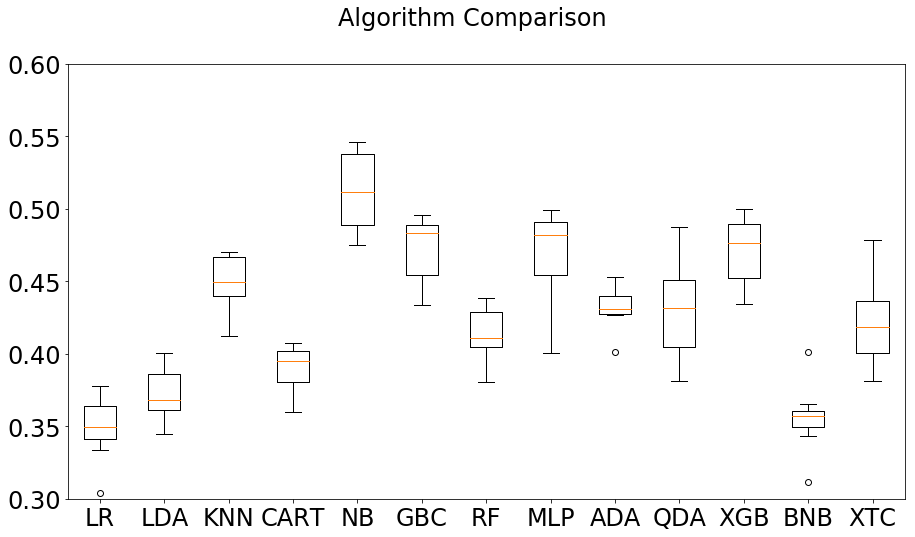

In [23]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Comparison', fontsize=24)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
plt.ylim([0.3,0.6])
ax.set_xticklabels(names)
plt.show()

## Imbalanced DataSet
Using the visualization tool and after computing the baseline, we noticed that the dataset is strongly imbalanced and due to this fact the classifiers are not able to make accurate predictions. To deal with these kind of datasets there are essentially two different approaches.

In [13]:
dc = DummyClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(dc, X_train, y_train, cv=kfold, scoring='f1')
print("F1 Baseline: {}, ({})".format(cv_results.mean(), cv_results.std()))

F1 Baseline: 0.22018741978408163, (0.012286490003268452)


## 1. Changing the threshold
The first method we tried was to changing the threshold in order to understand if F1 could improve. In fact, few papers exist which have demonstrated that, in some cases, F1 could improve just changing the threshold and as we can see plotting the precision-recall curve and the relative F1, some improvements could be achieved by following this path, even if the final results were still quite imprecise. [F1 Paper](https://arxiv.org/pdf/1402.1892.pdf)

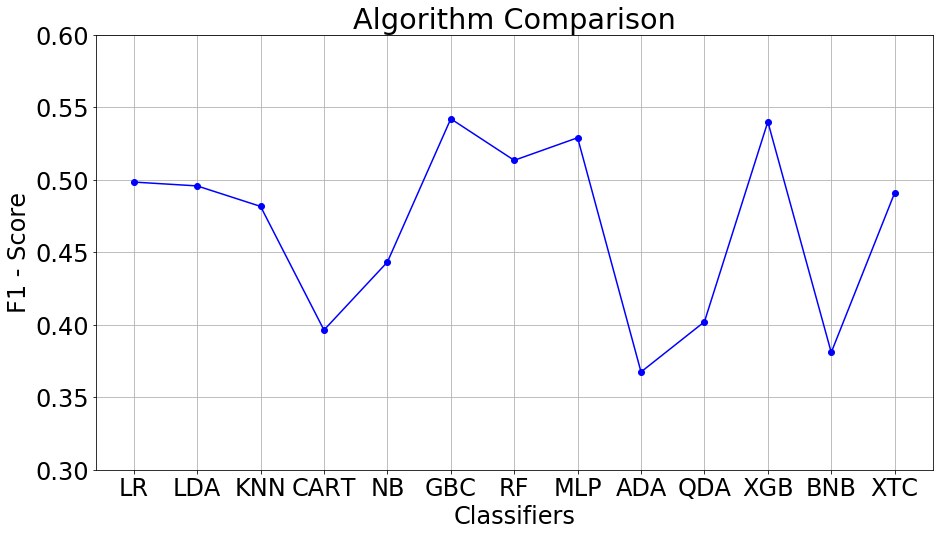

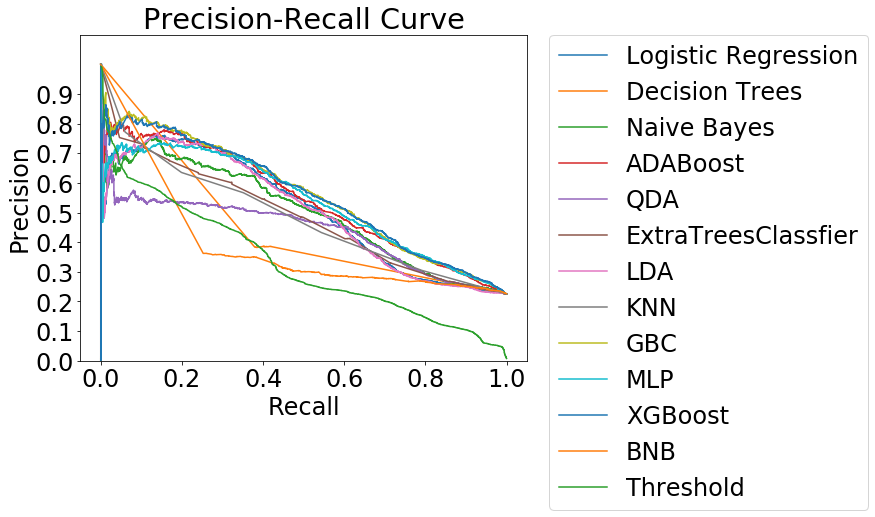

In [16]:
threshold = 0.3
scores = []

lr.fit(X_train,y_train)
yprob_lr = lr.predict_proba(X_test)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=yprob_lr[:,1])
auc_lr = average_precision_score(y_test, yprob_lr[:,1])

yprob_lr_th = yprob_lr[:,1] > threshold
f1_lr = f1_score(y_test, yprob_lr_th)
scores.append(f1_lr)

lda.fit(X_train,y_train)
yprob_lda = lda.predict_proba(X_test)
precision_lda, recall_lda, thresholds_lda = precision_recall_curve(y_true=y_test, probas_pred=yprob_lda[:,1])
auc_lda = average_precision_score(y_test, yprob_lda[:,1])

yprob_lda_th = yprob_lda[:,1] > threshold
f1_lda = f1_score(y_test, yprob_lda_th)
scores.append(f1_lda)

knn.fit(X_train,y_train)
yprob_knn = knn.predict_proba(X_test)
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=y_test, probas_pred=yprob_knn[:,1])
auc_knn = average_precision_score(y_test, yprob_knn[:,1])

yprob_knn_th = yprob_knn[:,1] > threshold
f1_knn = f1_score(y_test, yprob_knn_th)
scores.append(f1_knn)

dtc.fit(X_train,y_train)
yprob_dt = dtc.predict_proba(X_test)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test, probas_pred=yprob_dt[:,1])
auc_dt = average_precision_score(y_test, yprob_dt[:,1])

yprob_dt_th = yprob_dt[:,1] > threshold
f1_dt = f1_score(y_test, yprob_dt_th)
scores.append(f1_dt)


nb.fit(X_train,y_train)
yprob_nb = nb.predict_proba(X_test)
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=yprob_nb[:,1])
auc_nb = average_precision_score(y_test, yprob_nb[:,1])

yprob_nb_th = yprob_nb[:,1] > threshold
f1_nb = f1_score(y_test, yprob_nb_th)
scores.append(f1_nb)

gbc.fit(X_train,y_train)
yprob_gbc = gbc.predict_proba(X_test)
precision_gbc, recall_gbc, thresholds_gbc = precision_recall_curve(y_true=y_test, probas_pred=yprob_gbc[:,1])
auc_gbc = average_precision_score(y_test, yprob_gbc[:,1])

yprob_gbc_th = yprob_gbc[:,1] > threshold
f1_gbc = f1_score(y_test, yprob_gbc_th)
scores.append(f1_gbc)

rf.fit(X_train,y_train)
yprob_rf = rf.predict_proba(X_test)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test, probas_pred=yprob_rf[:,1])
auc_rf = average_precision_score(y_test, yprob_rf[:,1])

yprob_rf_th = yprob_rf[:,1] > threshold
f1_rf = f1_score(y_test, yprob_rf_th)
scores.append(f1_rf)

mlp.fit(X_train,y_train)
yprob_mlp = mlp.predict_proba(X_test)
precision_mlp, recall_mlp, thresholds_mlp = precision_recall_curve(y_true=y_test, probas_pred=yprob_mlp[:,1])
auc_mlp = average_precision_score(y_test, yprob_mlp[:,1])

yprob_mlp_th = yprob_mlp[:,1] > threshold
f1_mlp = f1_score(y_test, yprob_mlp_th)
scores.append(f1_mlp)      
  
ada.fit(X_train,y_train)
yprob_ada = ada.predict_proba(X_test)
precision_ada, recall_ada, thresholds_ada = precision_recall_curve(y_true=y_test, probas_pred=yprob_ada[:,1])
auc_ada = average_precision_score(y_test, yprob_ada[:,1])

yprob_ada_th = yprob_ada[:,1] > threshold
f1_ada = f1_score(y_test, yprob_ada_th)
scores.append(f1_ada)

qda.fit(X_train,y_train)
yprob_qda = qda.predict_proba(X_test)
precision_qda, recall_qda, thresholds_qda = precision_recall_curve(y_true=y_test, probas_pred=yprob_qda[:,1])
auc_qda = average_precision_score(y_test, yprob_qda[:,1])

yprob_qda_th = yprob_qda[:,1] > threshold
f1_qda = f1_score(y_test, yprob_qda_th)
scores.append(f1_qda)

xgb.fit(X_train,y_train)
yprob_xgb = xgb.predict_proba(X_test)
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_true=y_test, probas_pred=yprob_xgb[:,1])
auc_xgb = average_precision_score(y_test, yprob_xgb[:,1])

yprob_xgb_th = yprob_xgb[:,1] > threshold
f1_xgb = f1_score(y_test, yprob_xgb_th)
scores.append(f1_xgb)
    
bnb.fit(X_train,y_train)
yprob_bnb = bnb.predict_proba(X_test)
precision_bnb, recall_bnb, thresholds_bnb = precision_recall_curve(y_true=y_test, probas_pred=yprob_bnb[:,1])
auc_bnb = average_precision_score(y_test, yprob_bnb[:,1])

yprob_bnb_th = yprob_bnb[:,1] > threshold
f1_bnb = f1_score(y_test, yprob_bnb_th)
scores.append(f1_bnb)     
    
   
xtc.fit(X_train,y_train)
yprob_xtc = xtc.predict_proba(X_test)
precision_xtc, recall_xtc, thresholds_xtc = precision_recall_curve(y_true=y_test, probas_pred=yprob_xtc[:,1])
auc_xtc = average_precision_score(y_test, yprob_xtc[:,1])

yprob_xtc_th = yprob_xtc[:,1] > threshold
f1_xtc = f1_score(y_test, yprob_xtc_th)
scores.append(f1_xtc)

n = ['LR','LDA','KNN','CART','NB','GBC','RF','MLP','ADA','QDA','XGB','BNB', 'XTC']
n_number = [1,2,3,4,5,6,7,8,9,10,11,12,13]
#n = np.array(n)
scores = np.array(scores)
plt.figure(figsize=(15, 8))
plt.title('Algorithm Comparison')
plt.xlabel("Classifiers")
plt.ylabel("F1 - Score")
plt.grid()
plt.xticks(n_number, n)
plt.plot(n_number, scores, 'o-', color="blue")
plt.ylim([0.3,0.6])
plt.show()

plt.figure(1, figsize=(8, 6));
font = {'family':'sans', 'size':24};
plt.rc('font', **font);
plt.plot(recall_lr, precision_lr, label="Logistic Regression");
plt.plot(recall_dt, precision_dt, label="Decision Trees");
plt.plot(recall_nb, precision_nb, label="Naive Bayes");
plt.plot(recall_ada, precision_ada, label="ADABoost");
plt.plot(recall_qda, precision_qda, label="QDA");
plt.plot(recall_xtc, precision_xtc, label="ExtraTreesClassfier");
plt.plot(recall_lda, precision_lda, label="LDA");
plt.plot(recall_knn, precision_knn, label="KNN");
plt.plot(recall_gbc, precision_gbc, label="GBC");
plt.plot(recall_mlp, precision_mlp, label="MLP");
plt.plot(recall_xgb, precision_xgb, label="XGBoost");
#plt.plot(recall_sgdc, precision_sgdc, label="SGDC");
plt.plot(recall_bnb, precision_bnb, label="BNB");

plt.xlabel('Recall');
plt.ylabel('Precision');
plt.ylim([0.5,1.1])
plt.yticks(np.arange(0,1,.1))
plt.title('Precision-Recall Curve');
plt.plot(recall_lr[:-1],thresholds_lr, label="Threshold");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 2. Resampling the Dataset
The second method was to resampling the dataset in order to give a possibility to the classifiers to perform better. For this kind of task we used a different library known as imblearn. There are different kind of resampling methods (OverSampling, UnderSampling), but we decided to use EasyEnsemble, which creates an ensemble sets by iteratively applying random under-sampling. By default, it creates 10 different samples, here we create just one that is enough to perform our testing phase without loosing generalization.

In [24]:
print('Original dataset shape {}'.format(Counter(y_train)))

# Create the Samplers and Using our OWN Classifier
sme = SMOTEENN()
smt = SMOTETomek()
sm = SMOTE()

# Ensemble samplers
bc = BalanceCascade()
ee = EasyEnsemble(n_subsets=1)

X_res, y_res = ee.fit_sample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_res[0])))

Original dataset shape Counter({0: 15732, 1: 4431})
Resampled dataset shape Counter({1: 4431, 0: 4431})


## Algorithm Comparison with Reshaped Dataset
As we can see, just by reshaping the dataset we have increased the performances of almost all classifiers. Compared to the threshold method, we can say that the performances are better and more stable, so we resolved on using the resampling method to deal with the the problem of having a imbalanced dataSet.

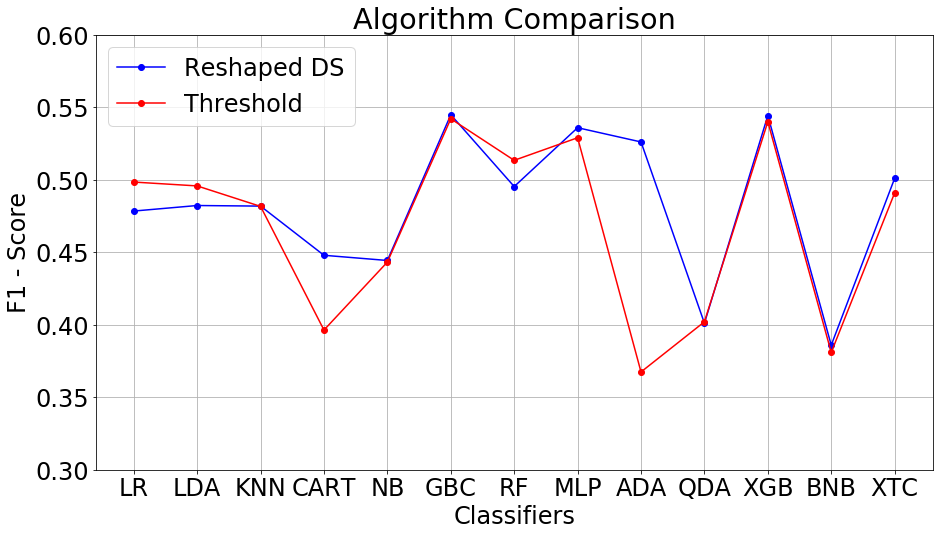

In [25]:
n = ['LR','LDA','KNN','CART','NB','GBC','RF','MLP','ADA','QDA','XGB','BNB','XTC']
n_number = [1,2,3,4,5,6,7,8,9,10,11,12,13]
#n = np.array(n)
plt.figure(figsize=(15, 8))
plt.title('Algorithm Comparison')
plt.xlabel("Classifiers")
plt.ylabel("F1 - Score")
plt.grid()
plt.xticks(n_number, n)

import matplotlib.cm as cm
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_res[0], y_res[0])
    y_pred = model.predict(X_test)
    result = f1_score(y_test, y_pred)
    results.append(result)
results = np.array(results)

plt.plot(n_number, results, 'o-', color='Blue', label="Reshaped DS")
plt.plot(n_number, scores, 'o-', color='Red', label="Threshold")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim([0.3,0.6])
plt.show()

As we can see, this time we didn't use crossvalidation to evaluate the different models, and this is due to the fact that by using resampling we have scores that do not reflect a real case since we fit on a dataset that has not the form of the real test set, which is most likely imbalanced, but instead the form of the reshaped one, that is balanced.
By using crossvalidation on this dataset the performances gets much better, as it was to be expected but, on the the other hand, we had to use crossvalidation to choose the best model in the later steps. This task, in fact, can't be performed using just hold out, since the produced result is too variable and not suited to compare the performances of two models.

## Computing best features
Before starting the tuning phase, we chose the best number of features for each classifier and we plotted the best (mean) performances that we could observe performing a complete exploration of all the possibilities.

MODEL: CART, AVG_SCORE: 0.6664418812566427, NUM_FEAT: 4
MODEL: GBC, AVG_SCORE: 0.6918118692654414, NUM_FEAT: 13
MODEL: RF, AVG_SCORE: 0.6698861426774403, NUM_FEAT: 4
MODEL: MLP, AVG_SCORE: 0.684104739255124, NUM_FEAT: 15
MODEL: ADA, AVG_SCORE: 0.6774112741890113, NUM_FEAT: 16
MODEL: XGB, AVG_SCORE: 0.6918205887928243, NUM_FEAT: 10
MODEL: XTC, AVG_SCORE: 0.6573364929211895, NUM_FEAT: 17


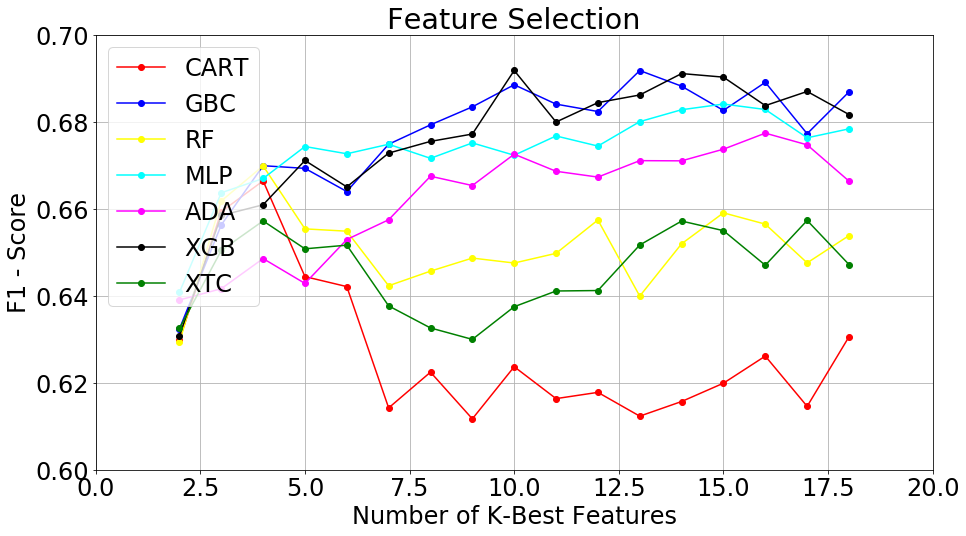

In [26]:
models = []
models.append(('CART', dtc, 'Red'))
models.append(('GBC', gbc, 'Blue'))
models.append(('RF', rf, 'Yellow')) 
models.append(('MLP', mlp, 'Cyan'))
models.append(('ADA', ada, 'Magenta'))
models.append(('XGB', xgb, 'Black'))
models.append(('XTC', xtc, 'Green'))

n = ['CART','GBC','RF','MLP','ADA','XGB', 'XTC']
n_number = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
n_number = np.array(n_number)
# Transforming the lists into array for plotting
plt.figure(figsize=(15, 8))
plt.title('Feature Selection')
plt.xlabel("Number of K-Best Features")
plt.ylabel("F1 - Score")
plt.grid()

num_feat_arr = []
for name, model, c in models:
    
    scores = [0, 0]
    results = []

    for n in range(2,19):

        selection = SelectKBest(k=n).fit(X_train,y_train)
        X_k = selection.transform(X_train)
        # Splitting the dataset into the Training set and Test set
        
        
        # Feature Scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_k = sc.fit_transform(X_k)
        
        # Reshape
        X_k_res, y_k_res = ee.fit_sample(X_k, y_train)
        
        score = cross_val_score(estimator = model, X = X_k_res[0], y = y_k_res[0], cv = 10, scoring='f1')
        f1 = score.mean()
        
        results.append(f1)
        
        std = score.std()
        if scores[0] < f1:
            scores = [f1, n]
  
    plt.plot(n_number, results, 'o-', color=c, label=name)
    
    num_feat_arr.append(scores[1])
    max_avg = np.average(scores)
    
    print("MODEL: {}, AVG_SCORE: {}, NUM_FEAT: {}".format(name, scores[0], scores[1]))  


plt.axis([0, 20 , 0.6, 0.7])
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

## Parameters Tuning
To boost the performances of each single classifier we computed the best parameters using the scikitlearn function GridSearchCV, which applies cross validation to a set of estimators tuned with different parameters and returns the one that has the best mean performances. Please notice that from now on we will consider only the classifiers that proved to be interesting for the given problem: all the others will be excluded by the analysis.

In [29]:
# Applying Grid Search to find the best model and the best parameters
# SVM
"""from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10], 'kernel': ['linear']},
              {'C': [1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9]}]

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring='f1',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_res[0], y_res[0])
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_f1)
print(best_parameters)"""

dtc = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3, min_samples_leaf=10, min_samples_split=2)
xtc = ExtraTreesClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=10, min_samples_split=2, n_estimators=220, n_jobs=-1)
ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=28)
rf = RandomForestClassifier(class_weight = 'balanced_subsample', max_depth = 14, min_samples_leaf = 20, min_samples_split = 4, n_estimators = 12)
gbc = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.16, loss = 'deviance', max_depth = 2, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 210)
xgb = XGBClassifier(gamma=0.0, learning_rate= 0.05, max_depth= 6, min_child_weight= 8, n_estimators= 100, subsample=0.8)
mlp = MLPClassifier(alpha=0.0005, learning_rate_init=0.01)

# Model Selection

## Algorithm Comparison with Reshaped DS after Parameters Tuning
In the following box we show those that will be the final results for each algorithm, useful to choose the final classifier.

CART: 0.668093 (0.008581)
GBC: 0.686793 (0.011261)
RF: 0.666304 (0.015754)
MLP: 0.663286 (0.023881)
ADA: 0.665978 (0.013953)
XGB: 0.686444 (0.008047)
XTC: 0.674101 (0.014464)


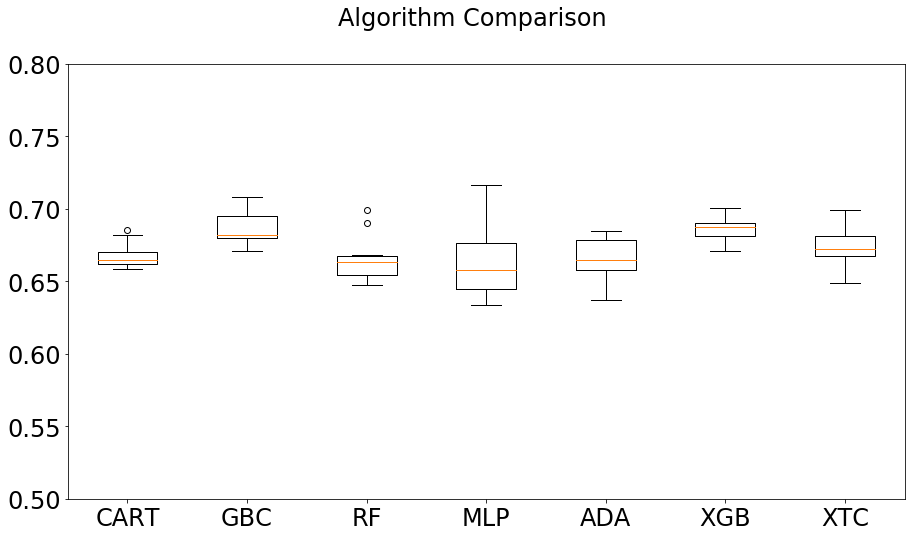

In [30]:
models = []
models.append(('CART', dtc, num_feat_arr[0]))
models.append(('GBC', gbc, num_feat_arr[1]))
models.append(('RF', rf, num_feat_arr[2]))
models.append(('MLP', mlp, num_feat_arr[3]))
models.append(('ADA', ada, num_feat_arr[4]))
models.append(('XGB', xgb, num_feat_arr[5]))
models.append(('XTC', xtc, num_feat_arr[6]))

n = ['CART','GBC','RF','MLP','ADA','XGB','XTC']
n_number = [1,2,3,4,5,6,7]

colors = cm.rainbow(np.linspace(0, 1, len(models)))

#Evaluate each model in turn
results = []
for name, model, num_feat in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    selection = SelectKBest(k=num_feat).fit(X_res[0],y_res[0])
    X_k = selection.transform(X_res[0])
    cv_results = model_selection.cross_val_score(model, X_k, y_res[0], cv=10, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
#We save the number of features of the best classifiers for later use
mlp_num_feat = num_feat_arr[3]
xgb_num_feat = num_feat_arr[5]

fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Comparison', fontsize=24)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
plt.ylim([0.5,0.8])
ax.set_xticklabels(n)
plt.show()

## Unpaired T-Test
Using the algorithm comparison we have seen that there are few models that perform much better than others. Now it's time to choose which model use comparing them with a statistical test.

In [32]:
#Comparison with unpaired t-test

scoring = 'f1'
xgb = XGBClassifier(gamma=0.0, learning_rate= 0.05, max_depth= 6, min_child_weight= 8, n_estimators= 100, subsample=0.8)
selection = SelectKBest(k=17).fit(X_train,y_train)
X_k = selection.transform(X_train)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_k = sc.fit_transform(X_k)
        
# Reshape
X_k_res, y_k_res = ee.fit_sample(X_k, y_train)

xgb_eval = model_selection.cross_val_score(xgb, X_k_res[0], y_k_res[0],scoring=scoring, cv=StratifiedKFold(n_splits=10,random_state=52725,shuffle=True))
print("XGB\t%4.3f\t%4.3f" % (np.average(xgb_eval), np.std(xgb_eval)))

mlp = MLPClassifier(alpha=0.0005, learning_rate_init=0.01)

selection = SelectKBest(k=16).fit(X_train,y_train)
X_k = selection.transform(X_train)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_k = sc.fit_transform(X_k)
        
# Reshape
X_k_res, y_k_res = ee.fit_sample(X_k, y_train)
mlp_eval = model_selection.cross_val_score(mlp, X_k_res[0], y_k_res[0],scoring=scoring, cv=StratifiedKFold(n_splits=10,random_state=52725,shuffle=True))
print("MLP\t%4.3f\t%4.3f" % (np.average(mlp_eval), np.std(mlp_eval)))

def PrintSignificance(stat, c):
    if (stat[1]<(1-c)):
        print("The difference is statistically significant (cf %3.2f)"%c)
    else:
        print("The difference is not statistically significant (cf %3.2f)"%c)

unpaired_xgb_mlp = stats.ttest_ind(xgb_eval, mlp_eval)
print("XGBoost vs MLP: p-value = %4.3f"%unpaired_xgb_mlp[1])
PrintSignificance(unpaired_xgb_mlp, 0.95)


XGB	0.688	0.021
MLP	0.679	0.025
XGBoost vs MLP: p-value = 0.422
The difference is not statistically significant (cf 0.95)


Since the t-test underlined the fact that two of the best classifiers have not a statistically significant difference in terms of performances, we chose XGBoost, that is one of the most stable methods for doing classification according to literature.

# Final Fitting
### XGBoost classifier with reshaped dataset and optimal number of features
Finally, we perform the fit on the entire dataset. We train the XGBoost classifier with the features selected in the previous boxes and we predict the values of the target column for the test set, saving them in the file 'result.csv'.

In [47]:
target = 'DEFAULT PAYMENT JAN'
features = cleaned_dataset.columns[cleaned_dataset.columns!=target]

x = cleaned_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = cleaned_dataset.iloc[:, 19].values

selection = SelectKBest(k=xgb_num_feat).fit(x,y)
x = selection.transform(x)

#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# reshaping
from imblearn.ensemble import EasyEnsemble 
ee = EasyEnsemble()
x_res, y_res = ee.fit_sample(x, y)
x_res = x_res[0]
y_res = y_res[0]

#fitto su tutto il modello
from sklearn import linear_model

classifier = XGBClassifier(gamma=0.0, learning_rate= 0.05, max_depth= 6, min_child_weight= 8, n_estimators= 100, subsample=0.8)
classifier.fit(x_res, y_res)

# import del testset
test = pd.read_csv('Project Test Dataset.csv', sep=';')
print(test.columns)

# Deleting useless columns
test.drop('SEX', axis=1, inplace=True)
test.drop('EDUCATION', axis=1, inplace=True)
test.drop('MARRIAGE', axis=1, inplace=True)
test.drop('BIRTH_DATE', axis=1, inplace=True)
test.drop('DEFAULT PAYMENT JAN', axis=1, inplace=True)

#salvo i customer codes e poi li droppo per fare la previsione
cust_code = test['CUST_COD']
test.drop('CUST_COD', axis=1, inplace=True)

# Training Data
x_test = test.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values

# K Features
x_test = selection.transform(x_test)

#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_test = sc.fit_transform(x_test)

#predico buovi valori
y_pred = classifier.predict(x_test)
print(y_pred)

#aggiungo colonne cust code e le rispettive previsioni
test['CUST_COD'] = cust_code
test['DEFAULT PAYMENT JAN'] = y_pred
print(test)
test.to_csv('result.csv',index=False)
print("Process finished! Check the result in the project folder.")

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')
[0 1 0 ..., 0 1 0]
      LIMIT_BAL  PAY_DEC  PAY_NOV  PAY_OCT  PAY_SEP  PAY_AUG  PAY_JUL  \
0     13117.984       -1        0        0        0        0       -1   
1       596.272        0        0        0        2        0        0   
2      1490.680        0        0        0        0        0        0   
3      5962.720       -1       -1       -1        0        0        0   
4      5366.448       -2       -2       -2       -2       -2       -2   
5       298.136        0        0        0        0        0        0   
6      4770.176        0        0        0        0        